In [ ]:
!pip install diffusers==0.2.4
!pip install transformers scipy ftfy
!pip install "ipywidgets>=7,<8"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 5.1 MB/s 
     |████████████████████████████████| 163 kB 29.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.9 MB 5.0 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 6.6 MB 42.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.8 MB/s 


In [ ]:
import os
from PIL import Image, ImageDraw
import cv2
import numpy as np
from IPython.display import HTML
from base64 import b64encode

import torch
from torch import autocast
from torch.nn import functional as F
from diffusers import StableDiffusionPipeline, AutoencoderKL
from diffusers import UNet2DConditionModel, PNDMScheduler, LMSDiscreteScheduler
from diffusers.schedulers.scheduling_ddim import DDIMScheduler
from transformers import CLIPTextModel, CLIPTokenizer
from tqdm.auto import tqdm
from huggingface_hub import notebook_login
from google.colab import output

device = 'cuda'

output.enable_custom_widget_manager()
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


In [ ]:

pipe = StableDiffusionPipeline.from_pretrained(
    'CompVis/stable-diffusion-v1-4', revision='fp16',
    torch_dtype=torch.float16, use_auth_token=True)
pipe = pipe.to(device)

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.34k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.63k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/608M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/209 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/572 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/246M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/788 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/772 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/71.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/550 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

0it [00:00, ?it/s]

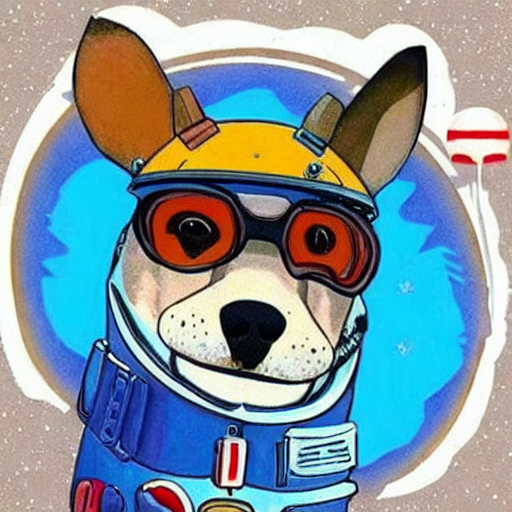

In [ ]:
prompt = 'Cute dog on moon'
with autocast(device):
  image = pipe(prompt, num_inference_steps=50)['sample'][0]
image

0it [00:00, ?it/s]

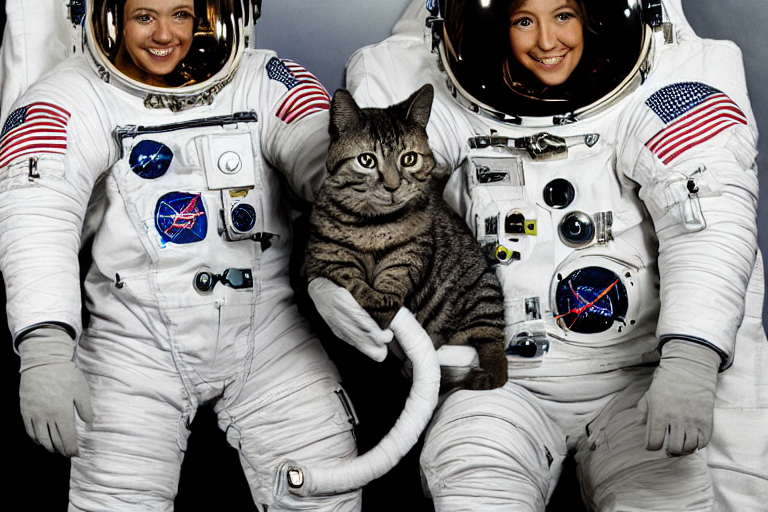

In [ ]:
#Stable Diffusion produces images of 512 × 512 pixels by default.
#the hight and wisth have to be a multiple of 8
prompt = "a photograph of an astronaut with a cat"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

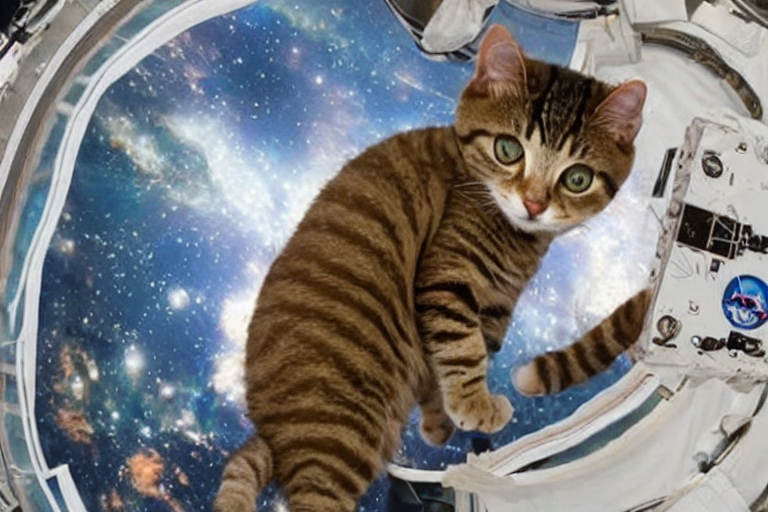

In [ ]:
prompt = "Astronaut cat"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

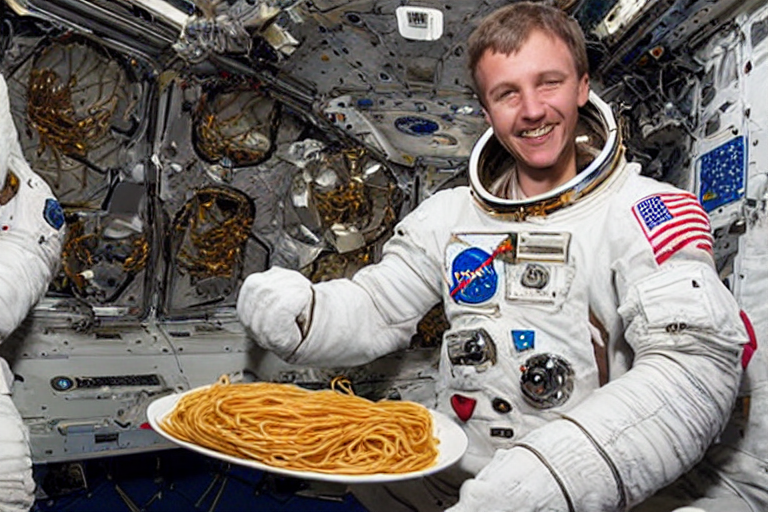

In [ ]:
prompt = "Astronaut eat spaghetti"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

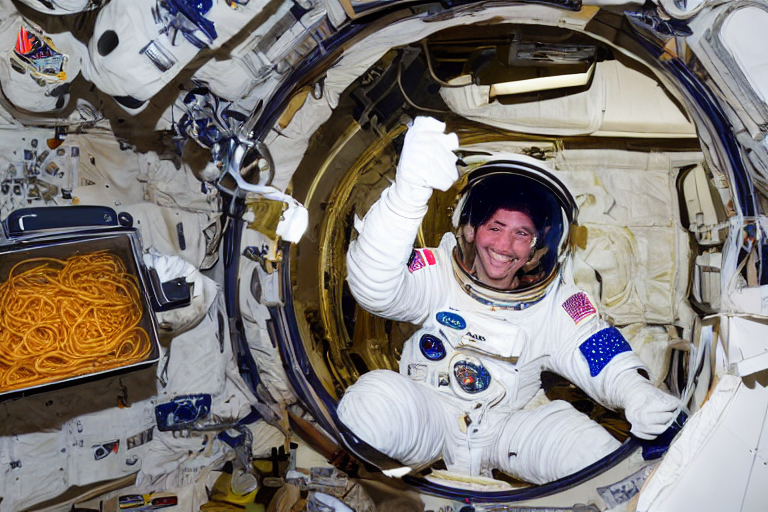

In [ ]:
prompt = "Astronaut cook spaghetti"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

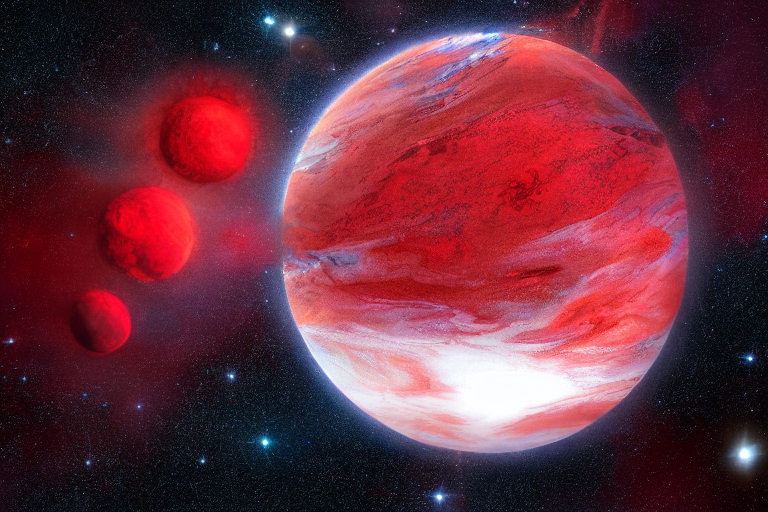

In [ ]:
prompt = "red planets space"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

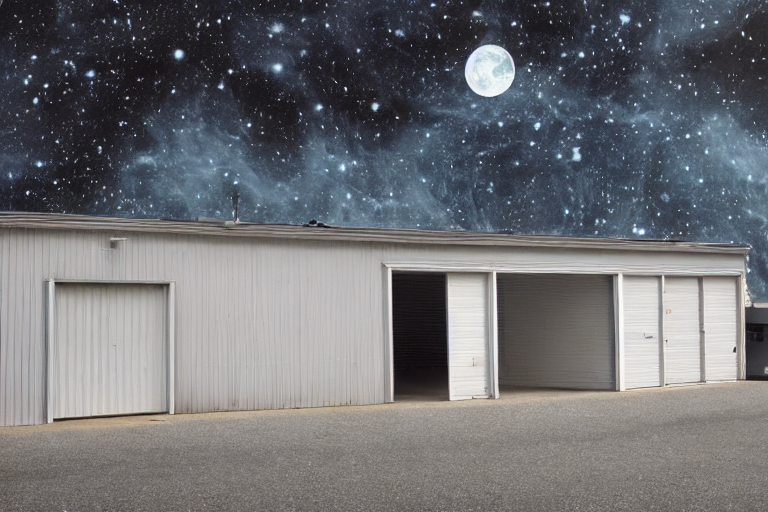

In [ ]:
prompt = "garage in the moon nasa"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

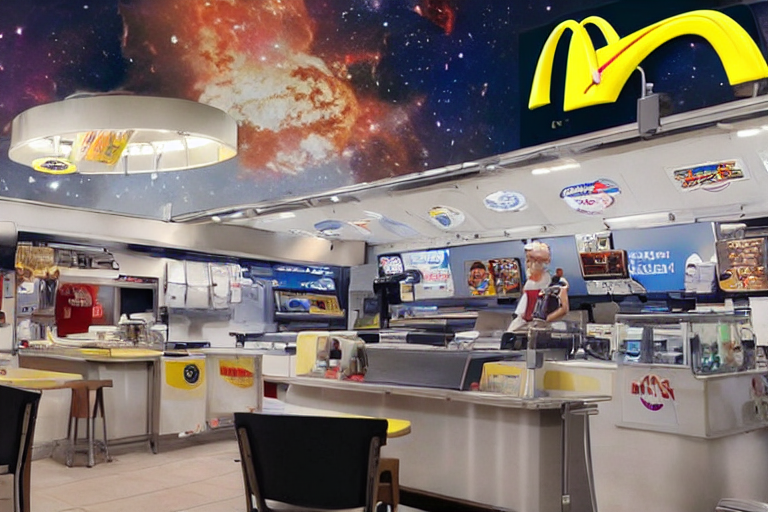

In [ ]:
prompt = "MC donald in nasa space"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image

0it [00:00, ?it/s]

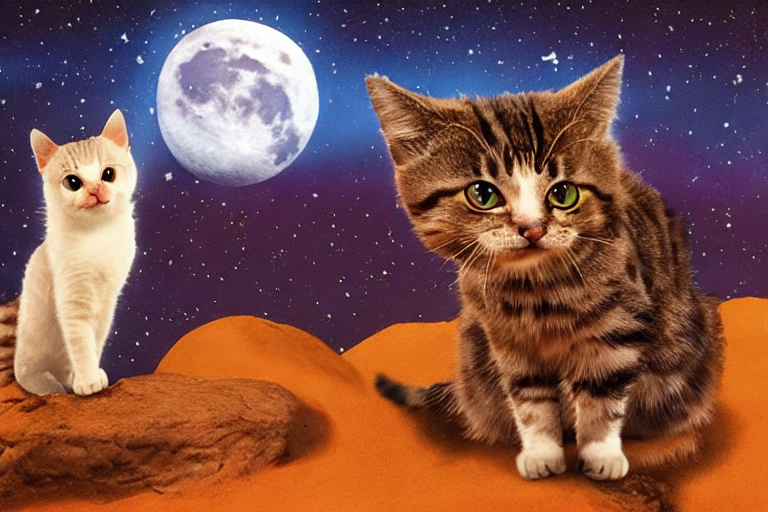

In [ ]:
prompt = "cat dansing in the moon"
with autocast("cuda"):
  image = pipe(prompt,num_inference_steps=50, height=512, width=768)['sample'][0]
image